In [186]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import os
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ROCAUC

In [106]:
cwd = os.getcwd()
df = pd.read_csv(cwd+'/datasets/bankCustomerChurn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [107]:
df.drop(['CustomerId','RowNumber','Surname'], axis = 1, inplace=True)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [108]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [109]:
cat_features = [key for key in dict(X.dtypes) if dict(X.dtypes)[key] in ['object']]
cat_features

for v in cat_features:
    X[v].fillna('missing', inplace=True)
    dummies=pd.get_dummies(df[v], prefix=v)
    X = pd.concat([X,dummies], axis=1)
    X.drop([v],axis=1, inplace=True)

In [110]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

rf = RandomForestClassifier(n_estimators=20, random_state=1)
rf_model = rf.fit(x_train, y_train)

In [128]:
y_pred = rf.predict(x_test)
y_test_predict = rf.predict_proba(x_test)
y_test_predict_forclass1 = rf.predict_proba(x_test)[:,1]

y_pred_train = rf.predict(x_train)
y_train_predict = rf.predict_proba(x_train)
y_train_predict_forclass1 = rf.predict_proba(x_train)[:,1]

In [129]:
y_test_predict

array([[0.9 , 0.1 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.7 , 0.3 ],
       [0.75, 0.25],
       [0.95, 0.05]])

In [130]:
y_test_predict_forclass1

array([0.1 , 0.  , 0.  , ..., 0.3 , 0.25, 0.05])

In [115]:
y_hat = pd.Series(y_pred).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
df_fin = pd.concat([y_test, y_hat], axis = 1)
df_fin.columns = ['Actual', 'Predicted']
df_fin

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [116]:
print(len(df_fin[df_fin.Actual != df_fin.Predicted]))
df_fin[df_fin.Actual != df_fin.Predicted]

438


,Actual,Predicted
11,1,0
26,1,0
27,1,0
34,1,0
36,0,1
...,...,...
2977,1,0
2988,0,1
2989,0,1
2992,1,0


In [182]:
import itertools
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    
    y_pred_labels = (y_pred > th).astype(int)
    cm = confusion_matrix(y_true, y_pred_labels)

    im = ax.imshow(cm, interpolation='nearest', cmap = cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j]),
        color = "white" if cm[i, j]>thresh else "black"
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')


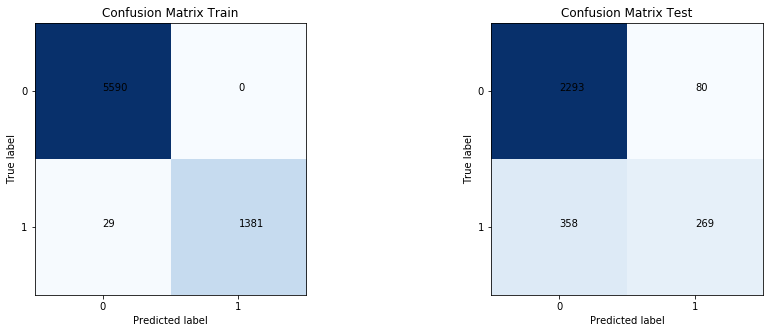

In [185]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
plot_cm(ax[0], y_train, y_train_predict_forclass1, [0,1], 'Confusion Matrix Train', 0.5)
plot_cm(ax[1], y_test, y_test_predict_forclass1, [0,1], 'Confusion Matrix Test', 0.5)

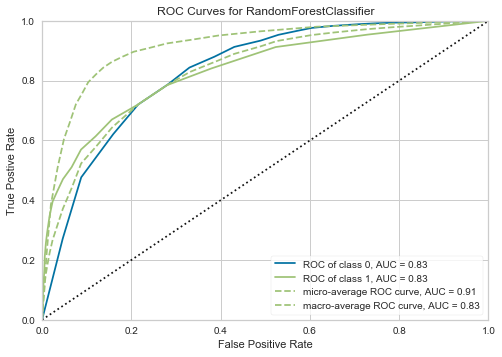

In [189]:
visualiser = ROCAUC(rf)
visualiser.score(x_test, y_test)
visualiser.show()

In [190]:
rf.feature_importances_

array([0.14607323, 0.22880655, 0.08504915, 0.14357079, 0.13045698,
       0.01778676, 0.03965495, 0.15104074, 0.00989428, 0.01739365,
       0.01033403, 0.01091804, 0.00902086])

In [184]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')


print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')


print("=== Accuracy Report ===")
print(accuracy_score(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[2293   80]
 [ 358  269]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2373
           1       0.77      0.43      0.55       627

    accuracy                           0.85      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.85      0.84      3000



=== Accuracy Report ===
0.854


